<a href="https://www.kaggle.com/code/innocentnovart/customer-personality-project?scriptVersionId=135146212" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **ABOUT THE PROJECT**
This project entails carrying out customer personality analysis by performing supervised and unsupervised machine learning models. The main objective of the project was to design two models as follows: -
1.	Customer segmentation (unsupervised learning) using the KMeans Clustering method.
2.	A classification model (supervised learning) to determine whether customers will purchase the company’s product or not. 

Generally, this report outlines the dataset used, the methodology employed, and the steps for training and evaluation, and provides an in-depth analysis of the model's performance and its potential applications.


# **Python Libraries used in the project**

In [1]:
'''
importing various libraries to be used in the code
'''
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import BaggingClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# **Reading the csv file**

In [2]:
'''
Reading the dataset file "customer data.csv" and assigning it to a pandas dataframe called "data".
'''
data = pd.read_csv("/kaggle/input/customer-data/Customer Data.csv")

# **EDA (Exploratory Data Analysis):**
### Data Cleaning, Handling Null Values, Feature Selection and Engineering, and Data Visualization.

In [3]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
'''
Checking the data for possible null values
'''
data.isnull().sum() # notice that the "Income" column has about 24 rows with null values
                    # hence, required to handle the null values accordingly

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [5]:
data['Income'].fillna(data['Income'].mean(skipna=True), inplace=True)  # filling the null values with the mean.
data.isnull().sum()                                     # cross-checking the dataframe

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [6]:
data['AcceptedCmp1'].unique()
data['AcceptedCmp2'].unique()
data['AcceptedCmp3'].unique()
data['AcceptedCmp4'].unique()
data['AcceptedCmp5'].unique()
data['Response'].unique()

array([1, 0])

In [7]:
'''
Since 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', and 'Response' all represents the costumers decision to buy or not to buy during promotion campaigns,
we merge the 6 columns into 1.
The new column is called "Purchased".
'''
data['Purchased'] = np.where((data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5'] + data['Response']) > 0, 1, 0) # this means, if the summation of each row from all the 6 columns is greater than 0
                                                                                                                                                                              # then, the customer purchased the company's product i.e 1. Otherwise the customer did not purchase i.e 0
data = data.drop('AcceptedCmp1', axis=1)
data = data.drop('AcceptedCmp2', axis=1)
data = data.drop('AcceptedCmp3', axis=1)
data = data.drop('AcceptedCmp4', axis=1)
data = data.drop('AcceptedCmp5', axis=1)
data = data.drop('Response', axis=1)

In [8]:
'''
Checking the resulting "Purchased" column after changes
'''
data['Purchased'].value_counts()          # The result shows that, after running 6 promotion campaigns, 609 costumers purchased while 1,631 did not purchase the product.

0    1631
1     609
Name: Purchased, dtype: int64

In [9]:
data['Kidhome'].unique()
data['Teenhome'].unique()

array([0, 1, 2])

In [10]:
'''
Since the "Kidhome" and "Teenhome" both represents the costumers children and both have similar unique values, we will merge the 2 columns into 1.
The new column is called "Children".
'''
data['Children'] = data['Kidhome'] + data['Teenhome']
data = data.drop('Kidhome', axis=1)
data = data.drop('Teenhome', axis=1)

In [11]:
'''
Checking the resulting "Children" column after changes
'''
data['Children'].value_counts()         # The result shows that 1,602 costumers have children at home while 638 do not have children at home.

1    1128
0     638
2     421
3      53
Name: Children, dtype: int64

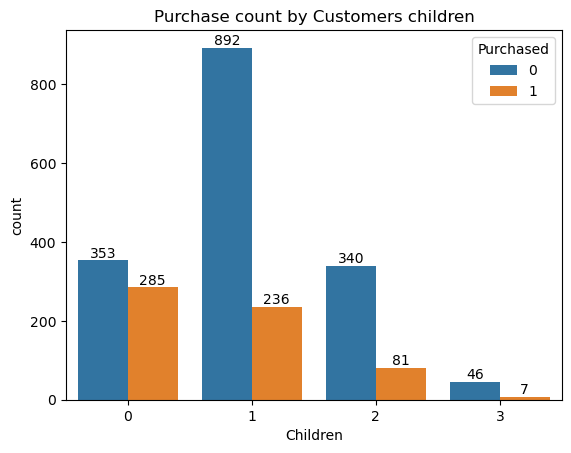

<Figure size 640x480 with 0 Axes>

In [12]:
'''
Creating the countplot of the number of purchases by customers children.
'''
ax = sns.countplot(x='Children', hue='Purchased', data=data)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.title('Purchase count by Customers children')
plt.show()
plt.savefig('Purchase count by Customers children.png')

In [13]:
data['Marital_Status'].unique() # notice that the marital status has about 8 distinctive statuses. This is not good for our classification task because classification is binary.
                                # hence, it is necessary to change the 8 distinctive statuses to 2 unique statuses.

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [14]:
'''
Choosing the status "single" and "in a relationship" as the 2 unique statuses
'''
data.loc[data['Marital_Status'] == 'Married', 'Marital_Status'] = 'In a Relationship'
data.loc[data['Marital_Status'] == 'Together', 'Marital_Status'] = 'In a Relationship'
data.loc[data['Marital_Status'] == 'Single', 'Marital_Status'] = 'Single'
data.loc[data['Marital_Status'] == 'Divorced', 'Marital_Status'] = 'Single'
data.loc[data['Marital_Status'] == 'Widow', 'Marital_Status'] = 'Single'
data.loc[data['Marital_Status'] == 'Alone', 'Marital_Status'] = 'Single'
data.loc[data['Marital_Status'] == 'YOLO', 'Marital_Status'] = 'Single'
data.loc[data['Marital_Status'] == 'Absurd', 'Marital_Status'] = 'Single'

In [15]:
'''
Checking the resulting "Marital_Status" column after the changes
'''
data['Marital_Status'].value_counts()    # The result shows that 1,444 costumers are in a relationship while 796 costumers are single.

In a Relationship    1444
Single                796
Name: Marital_Status, dtype: int64

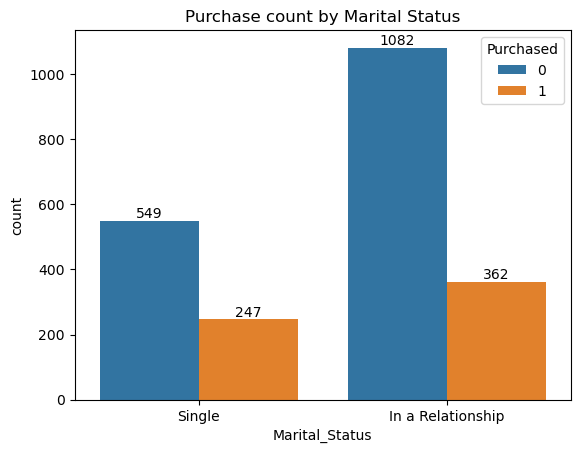

'\nFrom the viz, customers in a relationship are purchasing the product more that customers who are single.\nNevertheless, the majority of customers not purchasing the product are also in a relationship.\n'

<Figure size 640x480 with 0 Axes>

In [16]:
'''
Creating the countplot of the number of purchases by customers marital status.
'''
ax = sns.countplot(x='Marital_Status', hue='Purchased', data=data)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.title('Purchase count by Marital Status')
plt.show()
plt.savefig('Purchase count by Marital Status.png')
'''
From the viz, customers in a relationship are purchasing the product more that customers who are single.
Nevertheless, the majority of customers not purchasing the product are also in a relationship.
'''

In [17]:
'''
For computational convinience, the birth year should be changed to Age.
Therefore, we create a new column called "Age", and also drop the " Year_Birth" column
'''
import datetime

current_year = datetime.datetime.now().year
data['Age'] = current_year - data['Year_Birth']
data.drop('Year_Birth', axis=1, inplace=True)
data['Age'].value_counts()

47     89
52     87
48     83
51     79
45     77
53     77
50     74
58     74
54     71
49     69
67     55
65     53
44     53
71     52
46     52
55     51
64     51
57     50
69     50
68     49
63     49
41     45
60     45
56     44
61     44
66     43
72     43
40     42
37     42
59     42
43     39
42     39
39     38
62     36
70     35
38     32
34     30
74     30
73     29
35     29
36     27
75     21
33     18
77     16
76     16
32     15
31     13
78      8
80      7
79      7
30      5
28      5
29      3
27      2
124     1
82      1
130     1
123     1
83      1
Name: Age, dtype: int64

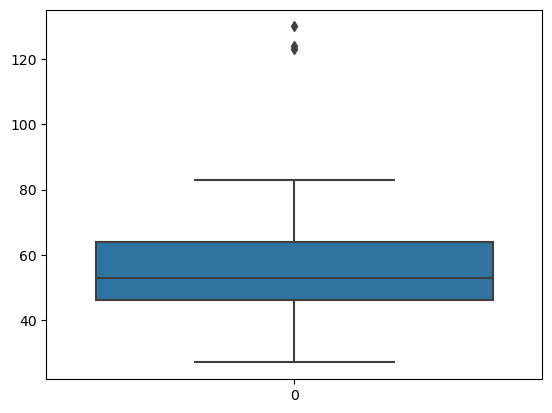

In [18]:
sns.boxplot(data['Age'])
plt.savefig('Age Boxplot.png')

In [19]:
data = data[data['Age']<100] # filtering the outliers.

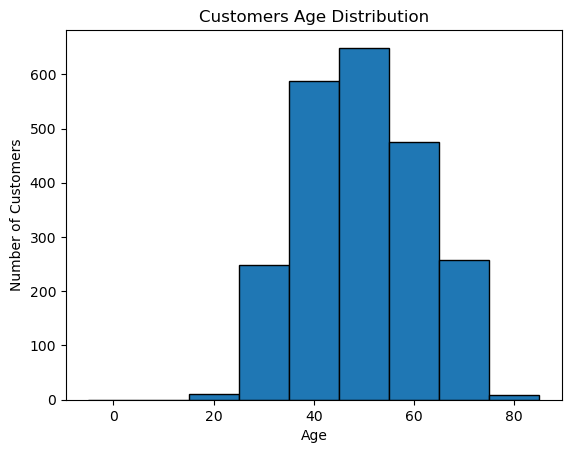

"\nThe customers age is normally distributed whereby the majority of customers are in their 50's.\nCustomers in their 40's are have the second highest frequency while customers in their 60's have the third.\nThe distribution of customers in their 30's and 70's is relatively similar with about 250 total customers.\nThere are few customers in their 20's and even fewer customers in their 80's.\n"

<Figure size 640x480 with 0 Axes>

In [20]:
hist, bins = np.histogram(data['Age'], bins=np.arange(0, data['Age'].max() + 10, 10))

plt.bar(bins[:-1], hist, width=10, edgecolor='black')

plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.title('Customers Age Distribution')
plt.show()
plt.savefig('Customers Age Distribution.png')
'''
The customers age is normally distributed whereby the majority of customers are in their 50's.
Customers in their 40's are have the second highest frequency while customers in their 60's have the third.
The distribution of customers in their 30's and 70's is relatively similar with about 250 total customers.
There are few customers in their 20's and even fewer customers in their 80's.
'''

'\nThe line of best fit shows that there is a positive correlation between the age and the purchases such that:\nas the age increases, so did the purchases.\nSimilarly, the error dispersion is less between 40 years and 60 years showing strong fit, while there is\nlarge error dispersion at 20 years and 80 years showing weak fit.\n'

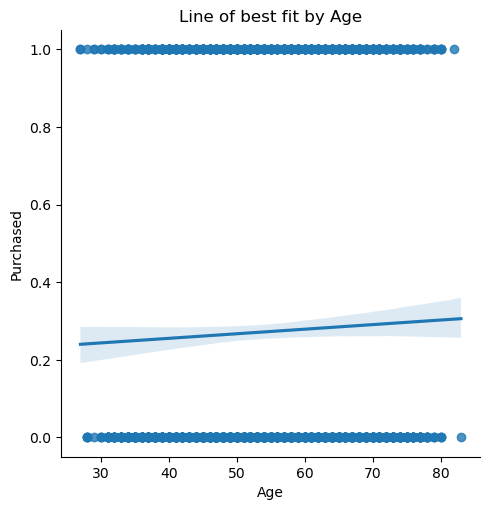

In [21]:
'''
Line of best fit (correlation) for purchases by Age.
'''

sns.lmplot(x='Age',y='Purchased',data=data)
plt.title('Line of best fit by Age')
plt.savefig('Line of best fit by Age.png')

'''
The line of best fit shows that there is a positive correlation between the age and the purchases such that:
as the age increases, so did the purchases.
Similarly, the error dispersion is less between 40 years and 60 years showing strong fit, while there is
large error dispersion at 20 years and 80 years showing weak fit.
'''

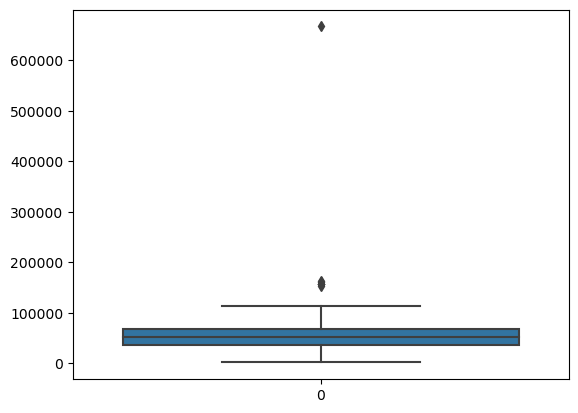

In [22]:
sns.boxplot(data['Income'])
plt.savefig('Income Boxplot.png')

In [23]:
data = data[data['Income']<120000] # filtering the outliers.

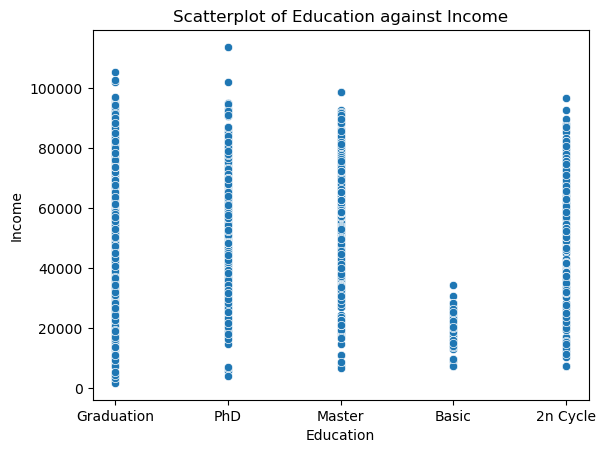

'\nCustomers with Basic education have the lowest income while the ones with a PhD have the highest income.\nCustomers with Graduation level of education are the second high income cusotmers.\nThe customers with Masters and 2nd cycle education have relatively similar level of income.\n'

<Figure size 640x480 with 0 Axes>

In [24]:
'''
Creating the scatterplot of the number of education against income.
'''
ax = sns.scatterplot(x='Education', y='Income', data=data)
plt.title('Scatterplot of Education against Income')
plt.show()
plt.savefig('Scatterplot of Education against Income.png')

'''
Customers with Basic education have the lowest income while the ones with a PhD have the highest income.
Customers with Graduation level of education are the second high income cusotmers.
The customers with Masters and 2nd cycle education have relatively similar level of income.
'''

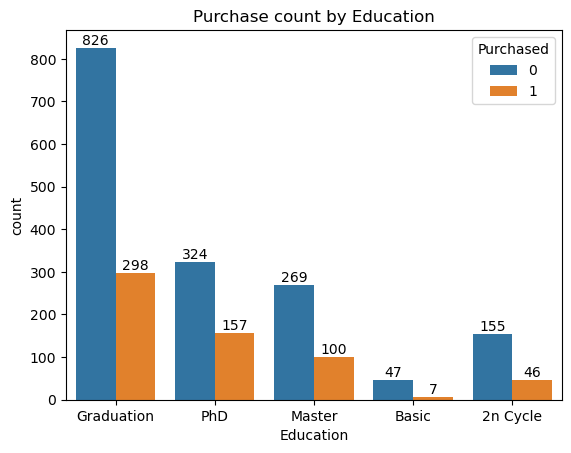

"\nCustomers with graduation level are leading in purchasing the company's product.\nCustomers with PhD level of education are the second highest purchasing cus  tmers.\nThe customers with Masters and 2nd cycle education have relatively similar level of income.\n"

<Figure size 640x480 with 0 Axes>

In [25]:
'''
Creating the countplot of the number of purchases by education.
'''
ax = sns.countplot(x='Education', hue='Purchased', data=data)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.title('Purchase count by Education')
plt.show()
plt.savefig('Purchase count by Education.png')
'''
Customers with graduation level are leading in purchasing the company's product.
Customers with PhD level of education are the second highest purchasing cus  tmers.
The customers with Masters and 2nd cycle education have relatively similar level of income.
'''

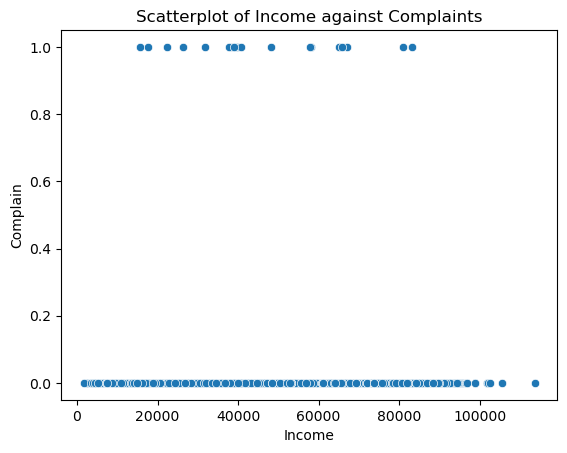

<Figure size 640x480 with 0 Axes>

In [26]:
ax = sns.scatterplot(x='Income', y='Complain', data=data)
plt.title('Scatterplot of Income against Complaints')
plt.show()
plt.savefig('Scatterplot of Income against Complaints.png')

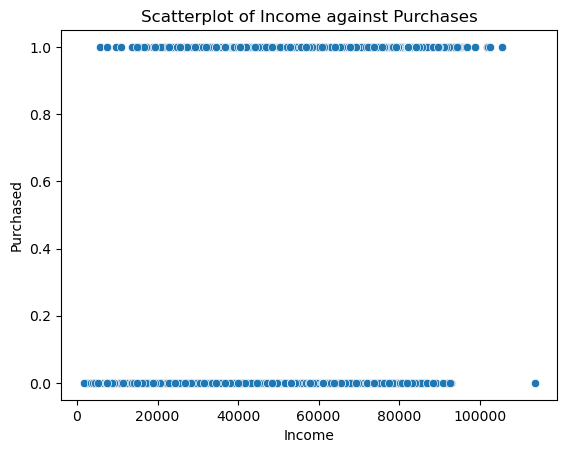

<Figure size 640x480 with 0 Axes>

In [27]:
ax = sns.scatterplot(x='Income', y='Purchased', data=data)
plt.title('Scatterplot of Income against Purchases')
plt.show()
plt.savefig('Scatterplot of Income against Purchases.png')

In [28]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])                               # Assigning the "DT_Customer" column as a datetime.
Monthly_Enrollment = data.set_index(data['Dt_Customer']).resample('MS').size()  # Setting the date as the index, grouping it by months, and counting the total number of customer enrollment in each month.

Monthly_Enrollment

/tmp/ipykernel_20/2565544378.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])                               # Assigning the "DT_Customer" column as a datetime.


Dt_Customer
2012-01-01     16
2012-02-01      9
2012-03-01     21
2012-04-01     16
2012-05-01     17
2012-06-01     14
2012-07-01     23
2012-08-01     91
2012-09-01     67
2012-10-01     81
2012-11-01     62
2012-12-01     76
2013-01-01     96
2013-02-01    112
2013-03-01    102
2013-04-01     94
2013-05-01     93
2013-06-01     95
2013-07-01     94
2013-08-01    103
2013-09-01     85
2013-10-01    106
2013-11-01    100
2013-12-01    102
2014-01-01     78
2014-02-01     65
2014-03-01     78
2014-04-01     71
2014-05-01     81
2014-06-01     61
2014-07-01     23
2014-08-01     16
2014-09-01     12
2014-10-01     22
2014-11-01     23
2014-12-01     24
Freq: MS, dtype: int64

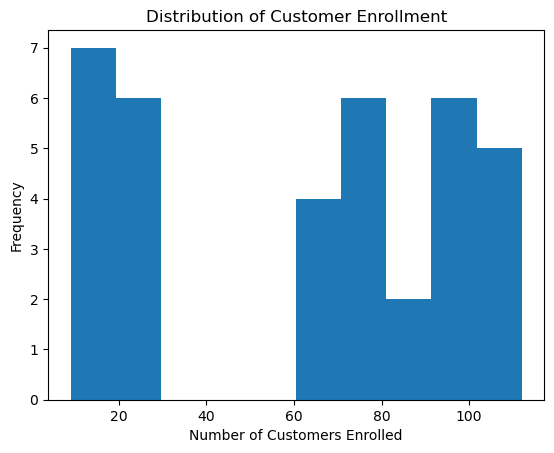

<Figure size 640x480 with 0 Axes>

In [29]:
plt.hist(Monthly_Enrollment)
plt.xlabel('Number of Customers Enrolled')
plt.ylabel('Frequency')
plt.title('Distribution of Customer Enrollment')
plt.show()
plt. savefig('Distribution of Customer Enrollment.png')

In [30]:
data['Total_Spending'] = data['MntWines']+data['MntFruits']+data['MntMeatProducts']+data['MntFishProducts']+data['MntSweetProducts']+data['MntGoldProds']

In [31]:
data.drop(['ID', 'Z_CostContact', 'Z_Revenue', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'], axis=1, inplace=True)

In [32]:
data.columns

Index(['Education', 'Marital_Status', 'Income', 'Dt_Customer', 'Recency',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Purchased',
       'Children', 'Age', 'Total_Spending'],
      dtype='object')

In [33]:
data.describe()

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Purchased,Children,Age,Total_Spending
count,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000
mean,51628.825945,49.106326,2.319874,4.100045,2.636608,5.812472,5.334231,0.008973,0.272768,0.951996,54.111261,605.541050
std,20601.302353,28.946476,1.895252,2.775461,2.796161,3.242144,2.414981,0.094319,0.445483,0.751976,11.707430,601.032228
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,5.000000
25%,35416.000000,24.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,46.000000,69.000000
50%,51563.000000,49.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,1.000000,53.000000,397.000000
75%,68118.000000,74.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,1.000000,1.000000,64.000000,1044.000000
max,113734.000000,99.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,3.000000,83.000000,2525.000000


/tmp/ipykernel_20/403488813.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  foo = sns.heatmap(data.corr(), vmax=1.0, square=True, annot=True)


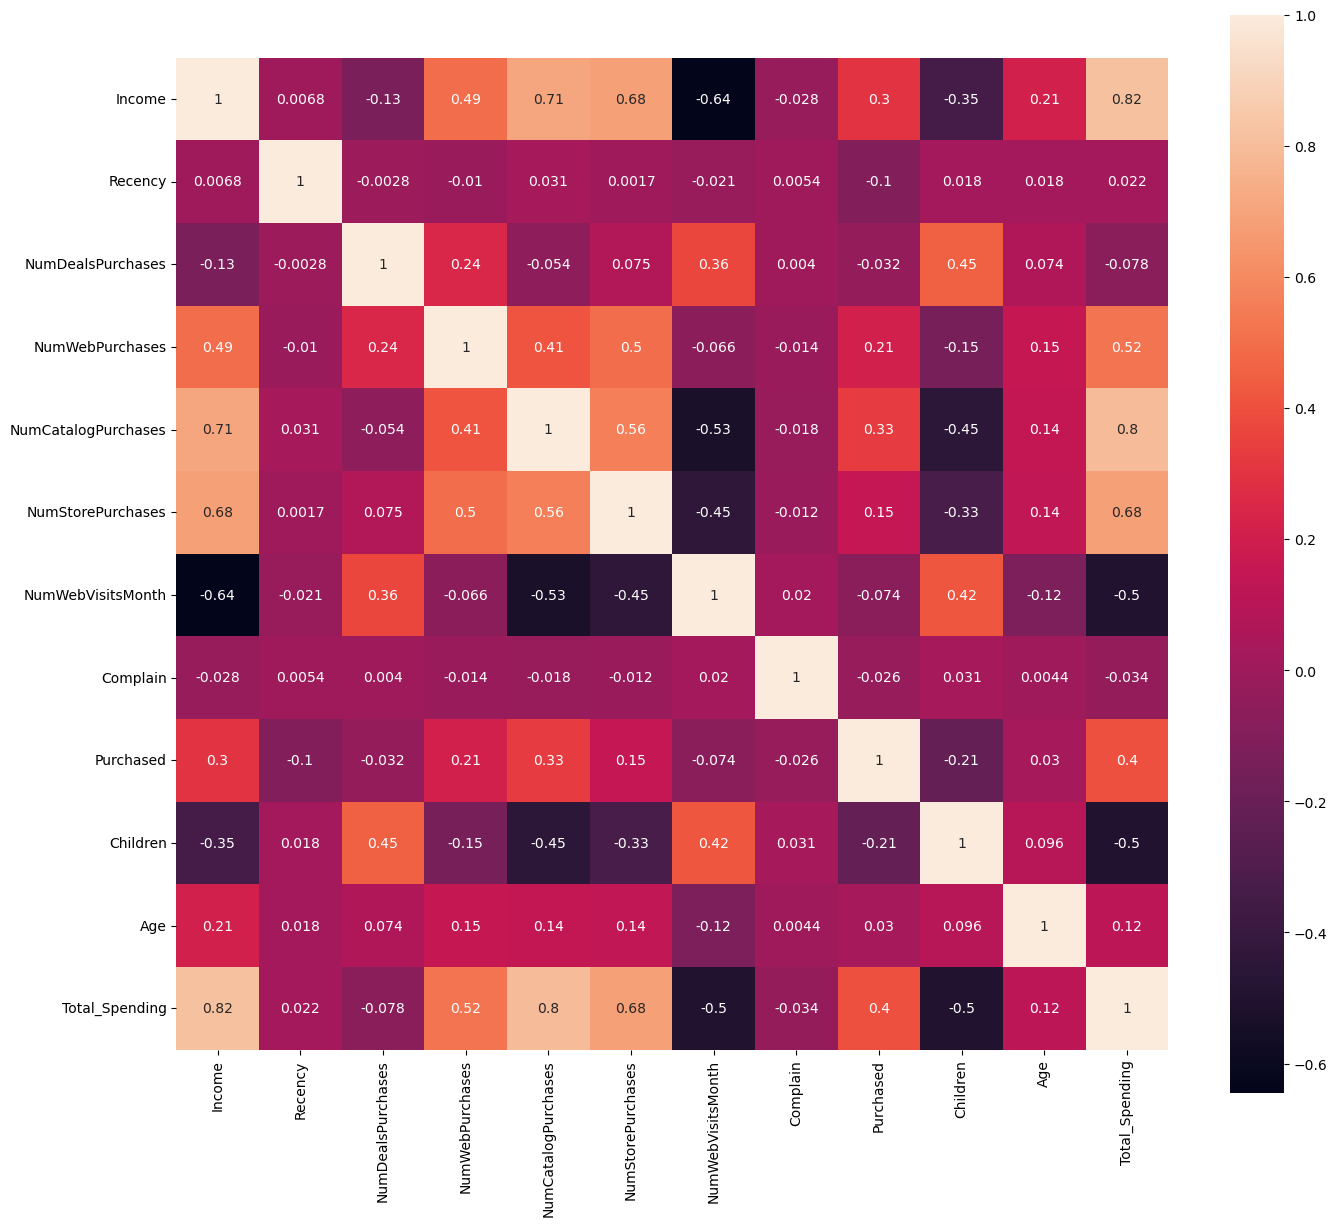

In [34]:
ax = plt.subplots( figsize =( 16 , 14 ) )
foo = sns.heatmap(data.corr(), vmax=1.0, square=True, annot=True)
plt.savefig('Correlation heatmap.png')

# **PREPARING THE DATA FOR MODELLING**
## Label Encoding

In [35]:
# Performing label encoding for Education
label_encoder = LabelEncoder()
data['Education'] = label_encoder.fit_transform(data['Education'])

encoded_labels = label_encoder.classes_
for label, encoded_value in enumerate(encoded_labels):
    print(f"The numerical value {label} corresponds to: {encoded_value}")

The numerical value 0 corresponds to: 2n Cycle
The numerical value 1 corresponds to: Basic
The numerical value 2 corresponds to: Graduation
The numerical value 3 corresponds to: Master
The numerical value 4 corresponds to: PhD


In [36]:
# Performing label encoding for Marital_Status
label_encoder = LabelEncoder()
data['Marital_Status'] =label_encoder.fit_transform(data['Marital_Status'])

encoded_labels = label_encoder.classes_
for label, encoded_value in enumerate(encoded_labels):
    print(f"The numerical value {label} corresponds to: {encoded_value}")

The numerical value 0 corresponds to: In a Relationship
The numerical value 1 corresponds to: Single


# **UNSUPERVISED MACHINE LEARNING**
## Customer Segmentation with KMeans Clustering

In [37]:
data.columns

Index(['Education', 'Marital_Status', 'Income', 'Dt_Customer', 'Recency',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Purchased',
       'Children', 'Age', 'Total_Spending'],
      dtype='object')

In [38]:
segment = data.drop(['Education', 'Marital_Status', 'Dt_Customer', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Purchased','Children'], axis=1)

In [39]:
segment.head(3)

,Income,Recency,NumDealsPurchases,Age,Total_Spending
0,58138.0,58,3,66,1617
1,46344.0,38,2,69,27
2,71613.0,26,1,58,776


In [40]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(segment)

In [41]:
kmeans = KMeans()
kmeans.fit(scaled_features)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans()

In [42]:
cluster_range = range(2,21)
inertia_range = []
silhoute_range = []
for i in cluster_range:
  kmeans_i = KMeans(n_clusters=i, init='random')
  kmeans_i.fit(scaled_features)
  inertia_range.append(kmeans_i.inertia_)
  silhoute_range.append(metrics.silhouette_score(scaled_features, kmeans_i.labels_))

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

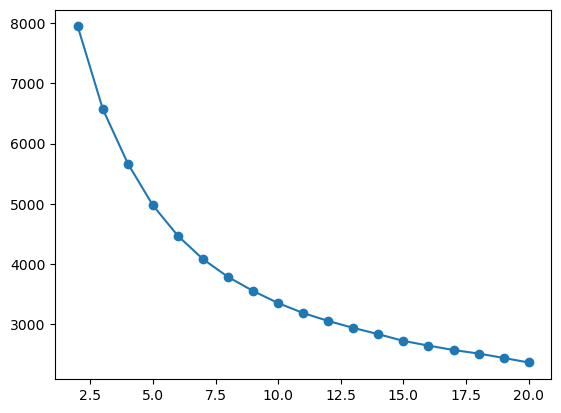

In [43]:
plt.plot(cluster_range, inertia_range, marker='o')
plt.savefig('Elbow graph.png')

In [44]:
print(list(cluster_range))
print()
print(list(inertia_range))
print()
print(list(silhoute_range))

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

[7946.56482545279, 6573.298448517652, 5667.710314502854, 4973.802439130313, 4466.085964216714, 4079.833310563832, 3783.9583488901703, 3550.949155734303, 3349.8662987088846, 3184.212602874608, 3052.405721590781, 2937.5191496392617, 2832.784017192421, 2721.1652662290553, 2642.97244250877, 2569.7016626138507, 2511.5166627306235, 2438.1818847522854, 2362.8140845414446]

[0.2806039356645891, 0.27881421035970405, 0.24423649086876587, 0.2367642637030509, 0.23391008976399102, 0.23330336686534558, 0.22186778604317073, 0.22785570187318893, 0.22146203787077184, 0.22211365519221227, 0.22122538876331452, 0.21539194086636396, 0.21913570376474467, 0.20916411460092557, 0.2013745788988364, 0.19558818505381248, 0.1992560646902859, 0.2006550965796411, 0.1952170584323101]


**Intepreting the results:**

from the silhouette list, it can be observed that k=2 has the highest score 0.28 while k=3 has the second highest score of 0.278. K=4 is not considered due to the huge change in score as compared to k=2 and k=3.

similarly, considering the inertia range for compactness of clusters, k=3 has a better (lower) inertia score as compared to k=2.

Hence, the desirable value of k will be 3.

In [45]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(scaled_features)
kmeans.labels_

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 0, 1, ..., 1, 1, 2], dtype=int32)

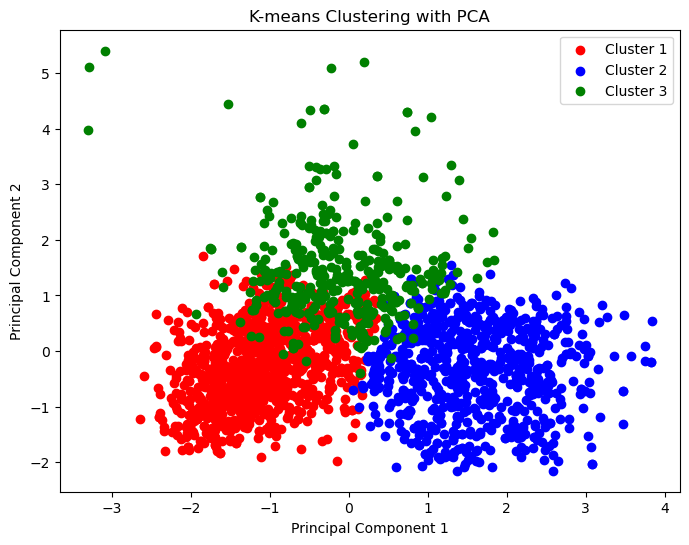

<Figure size 640x480 with 0 Axes>

In [46]:
# Perform PCA on the data
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_features)

# Plot the scatter plot of the clusters
plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green', 'orange', 'purple', 'yellow']  # Add more colors if needed

for i in range(len(np.unique(kmeans.labels_))):
    plt.scatter(pca_data[kmeans.labels_ == i, 0], pca_data[kmeans.labels_ == i, 1], c=colors[i], label=f'Cluster {i+1}')

plt.title('K-means Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()
plt.savefig('KMeans Clusterign with PCA.png')

# **SUPERVISED MACHINE LEARNING**
## Classification Models

In [47]:
cols = ['Dt_Customer', 'Purchased']
X = data.drop(cols, axis=1)
X.head(3)

,Education,Marital_Status,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Children,Age,Total_Spending
0,2,1,58138.0,58,3,8,10,4,7,0,0,66,1617
1,2,1,46344.0,38,2,1,1,2,5,0,2,69,27
2,2,0,71613.0,26,1,8,2,10,4,0,0,58,776


In [48]:
y = data['Purchased'].copy()
y.head(3)

0    1
1    0
2    0
Name: Purchased, dtype: int64

### Training and Testing sets

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state=42)
print("Total sample size = %i; \nfeature training sample size = %i, \ntarget training sample size = %i, \nfeature testing sample size = %i, \ntarget testing sample size= %i"\
     %(data.shape[0], X_train.shape[0],y_train.shape[0],X_test.shape[0], y_test.shape[0]))

Total sample size = 2229; 
feature training sample size = 1783, 
target training sample size = 1783, 
feature testing sample size = 446, 
target testing sample size= 446


### kNN

In [50]:
knn = KNeighborsClassifier(n_neighbors=10, weights='distance')
knn_model = knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       321
           1       0.64      0.40      0.49       125

    accuracy                           0.77       446
   macro avg       0.72      0.66      0.67       446
weighted avg       0.75      0.77      0.75       446



### Decision Tree

In [51]:
dt = DecisionTreeClassifier(max_depth=3, class_weight='balanced', min_weight_fraction_leaf=0.01)
dt_model = dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.62      0.72       321
           1       0.43      0.74      0.54       125

    accuracy                           0.65       446
   macro avg       0.64      0.68      0.63       446
weighted avg       0.74      0.65      0.67       446



### Logistic Regression

In [52]:
lgr = LogisticRegression()
lgr_model = lgr.fit(X_train, y_train)

y_pred = lgr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85       321
           1       0.66      0.42      0.51       125

    accuracy                           0.78       446
   macro avg       0.73      0.67      0.68       446
weighted avg       0.76      0.78      0.76       446



### Bagging

In [53]:
bagging = BaggingClassifier(
    KNeighborsClassifier(
        n_neighbors=2,
        weights='distance'
        ),
    oob_score=True,
    max_samples=0.5,
    max_features=1.0
    )
bag_model = bagging.fit(X_train, y_train)

y_pred = lgr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85       321
           1       0.66      0.42      0.51       125

    accuracy                           0.78       446
   macro avg       0.73      0.67      0.68       446
weighted avg       0.76      0.78      0.76       446



### Random Forest

In [54]:
rf = RandomForestClassifier(
    n_estimators=1000,
    max_depth=None,
    min_samples_split=10,
    class_weight="balanced",
    min_weight_fraction_leaf=0.02
    )
rf_model = rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82       321
           1       0.55      0.67      0.60       125

    accuracy                           0.75       446
   macro avg       0.70      0.73      0.71       446
weighted avg       0.77      0.75      0.76       446



### Gradient Boosting

              precision    recall  f1-score   support

           0       0.85      0.88      0.86       321
           1       0.65      0.59      0.62       125

    accuracy                           0.80       446
   macro avg       0.75      0.74      0.74       446
weighted avg       0.79      0.80      0.79       446



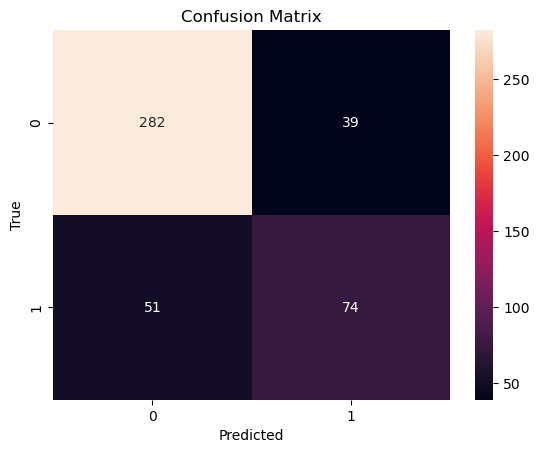

In [55]:
gb = GradientBoostingClassifier(
            loss='exponential',
            n_estimators=1000,
            learning_rate=0.5,
            max_depth=3,
            subsample=0.5,
            random_state=15
            )
gb_model = gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)
print(classification_report(y_test, y_pred))

matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('Confusion Matrix - Gradient Boosting')

### Extreme Gradient Boosting

In [56]:
# define data_dmatrix
data_dmatrix = xgb.DMatrix(data=X, label=y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# declare parameters
params = {
            'objective':'binary:logistic',
            'max_depth': 3,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':500
        }

# instantiate the classifier
xgb = XGBClassifier(**params)


# fit the classifier to the training data
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       483
           1       0.67      0.48      0.56       186

    accuracy                           0.79       669
   macro avg       0.75      0.70      0.71       669
weighted avg       0.78      0.79      0.78       669



# **CLASSIFICATION MODELS SUMMARY:**

Different classification models and ensembles were used for prediction; KNN, Decision Trees, and Logistic Regression classifiers; and Random Forests, Bagging, Gradient Boosting, Extreme Gradient Boosting ensembles.

Among them all, **Gradient Boosting ensemble** predicted our dataset with the most desirable metrics; 80% Accuracy, 85% precision, and 88% recall. Considering the confusion matrix, it can be summarized that: -

1. The model correctly predicted 282 instances as positive (true positives).
2. The model incorrectly predicted 51 instances as positive when they were actually negative (false positives).
3. The model incorrectly predicted 39 instances as negative when they were actually positive (false negatives).
4. The model correctly predicted 74 instances as negative (true negatives).
